Convolution experiment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

In [2]:
import torch

In [62]:
xv = torch.arange(8000, 12000, 0.01)

In [63]:
xv.shape

torch.Size([400000])

In [66]:
period = 85
yv = (torch.clamp(torch.sin(2.0*3.14*xv/period), 0.85, 0.851) - 0.85)*1000.0

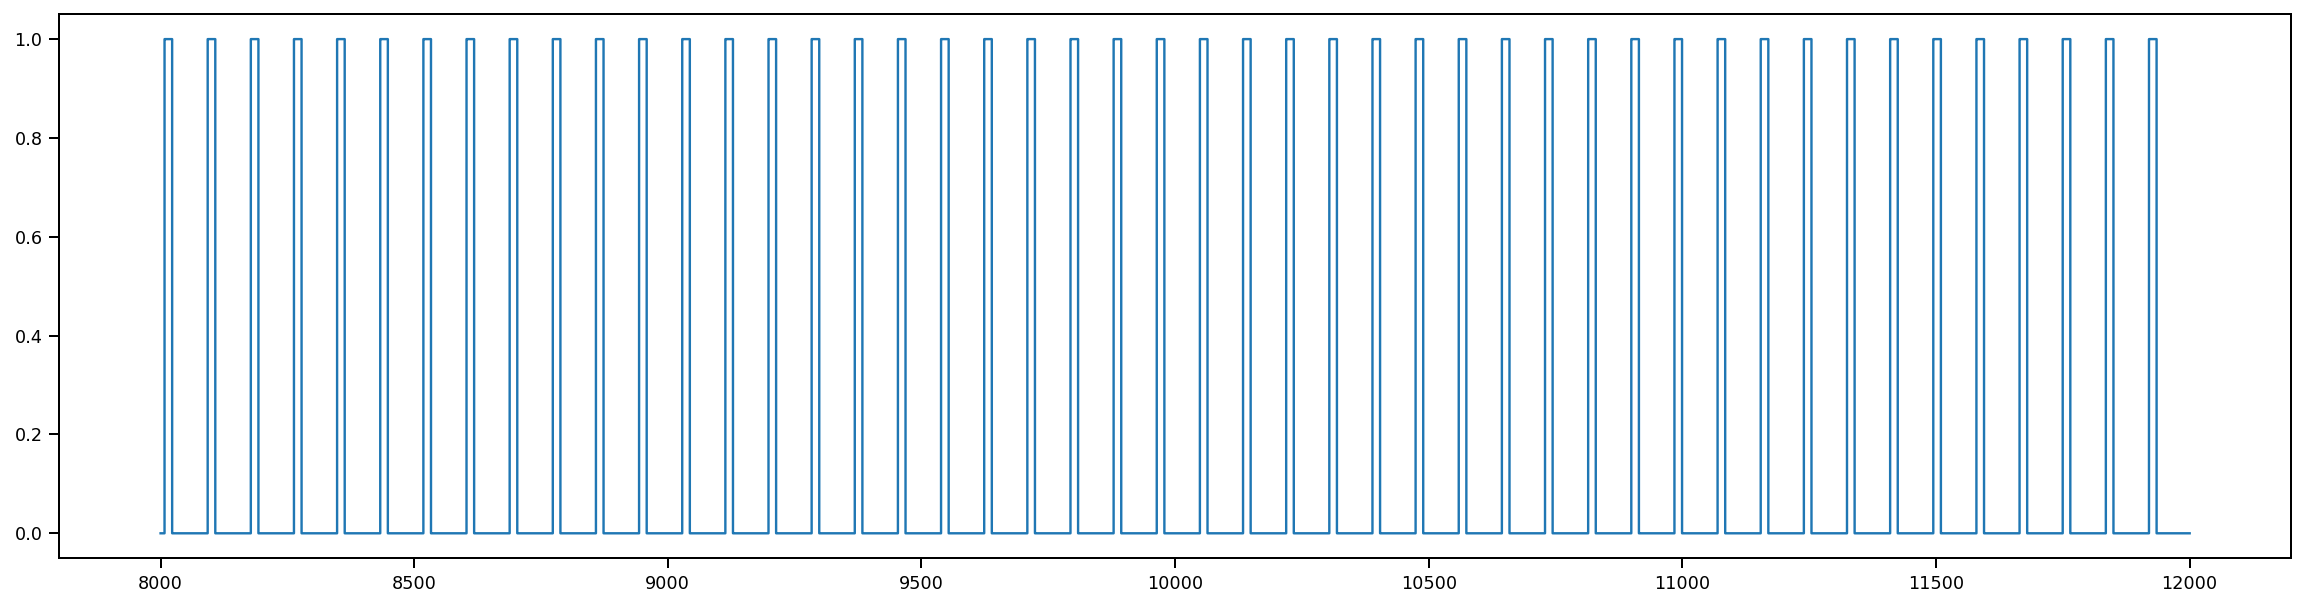

In [67]:
plt.figure(figsize=(20, 5))
plt.step(xv, yv);

In [68]:
#conv = torch.nn.Conv1d(1, 1, kernel_size=31, padding=2)

In [156]:
dv = torch.arange(-950, 951.0, 1, dtype=torch.float)

In [168]:
sigma = 200.1
weights = 1/(sigma*torch.sqrt(torch.tensor(2*3.14159)))*torch.exp(-1.0/2.0*dv**2/sigma**2)

In [189]:
%%time
output = torch.nn.functional.conv1d(yv.unsqueeze(0).unsqueeze(1), weights.unsqueeze(0).unsqueeze(1), padding='same')

CPU times: user 3.17 s, sys: 0 ns, total: 3.17 s
Wall time: 529 ms


In [190]:
output.shape

torch.Size([1, 1, 400000])

In [196]:
np.log(0.2)

-1.6094379124341003

In [194]:
10_000/0.2

50000.0

In [191]:
output = output.squeeze()

In [192]:
output.shape

torch.Size([400000])

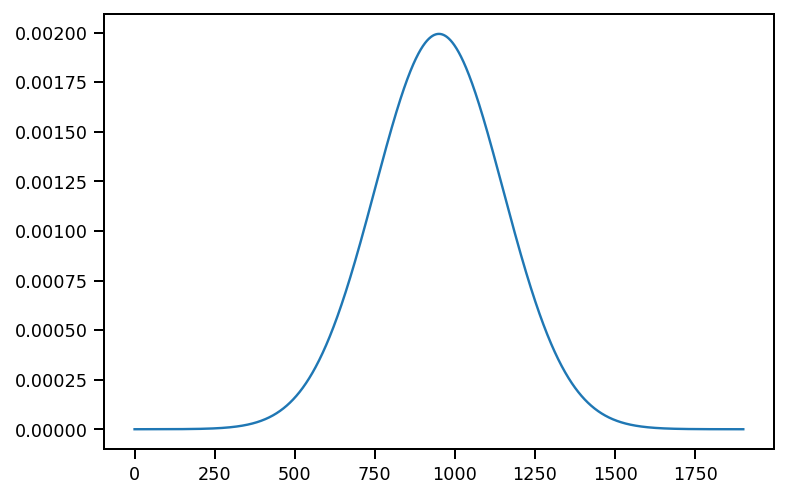

In [173]:
plt.plot(weights)

(9000.0, 9500.0)

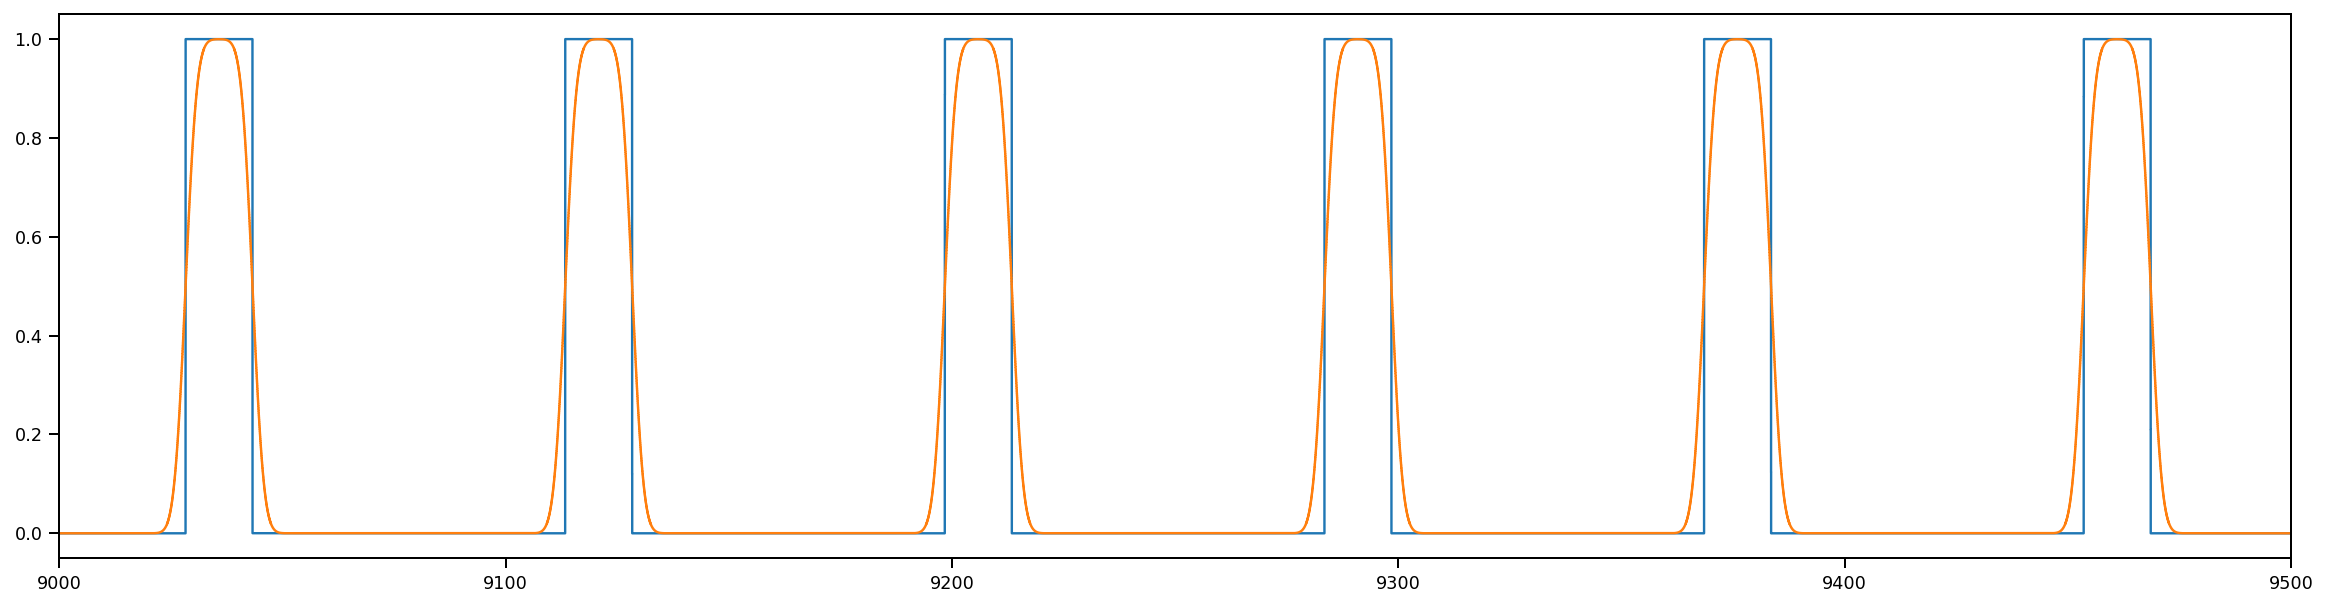

In [174]:
plt.figure(figsize=(20, 5))
plt.step(xv, yv);
plt.step(xv, output);
plt.xlim(9000, 9500)

In [175]:
mask = (xv>9000) & (xv<9100)

In [176]:
yv[mask].sum()

tensor(1499.2642)

In [177]:
output[mask].sum()

tensor(1499.2634)

In [1]:
from blase.datasets import HPFDataset

In [2]:
from blase.multiorder import MultiOrder

In [3]:
dat = HPFDataset('../test/data/Goldilocks_20191022T013208_v1.0_0003.spectra.fits')

In [4]:
model = MultiOrder(wl_data=dat.data_cube[6, :, :])

In [12]:
import torch

In [25]:
with torch.no_grad():
    model.log_blur_size -= 0.5

In [26]:
model.log_blur_size

Parameter containing:
tensor(-1.5000, device='cuda:0', dtype=torch.float64, requires_grad=True)

In [28]:
np.exp(-1.5)

0.22313016014842982

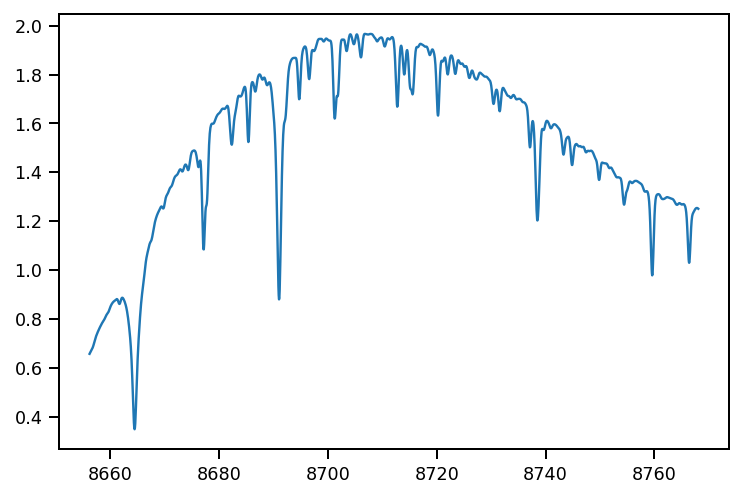

In [27]:
plt.plot(dat.data_cube[6, 5, :],model(5).cpu().detach())

In [11]:
np.exp(1.67)

5.312167797181167

In [150]:
%%time
out = model.wl_native.cpu().numpy()

CPU times: user 0 ns, sys: 16.8 ms, total: 16.8 ms
Wall time: 14.6 ms


In [136]:
dat.data_cube[6, 5, :]

tensor([8656.1736, 8656.2373, 8656.3010,  ..., 8767.9595, 8768.0046,
        8768.0498], dtype=torch.float64)

In [137]:
vec = dat.data_cube[6, 5, :]

In [143]:
np.median(np.diff(vec.numpy()))

0.054761136234446894

In [1]:
190/2

95.0

In [3]:
import torch

In [8]:
x1 = torch.arange(190) - 190 // 2

In [11]:
189//2

94

In [13]:
import math

In [14]:
math.pi

3.141592653589793

In [ ]:
torch.inverse()

In [12]:
torch.div(1, torch.tensor(3))

tensor(0.3333)

In [ ]:
weights = torch.exp((-self.conv_x ** 2 / (2 * blur_size_pixels ** 2)))

In [9]:
x1

tensor([-95, -94, -93, -92, -91, -90, -89, -88, -87, -86, -85, -84, -83, -82,
        -81, -80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68,
        -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54,
        -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40,
        -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26,
        -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
         31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  

In [161]:
kornia.filters.get_gaussian_kernel1d(131, sigma=3.1).double().to('cuda')

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8026e-45, 2.1300e-43, 1.7794e-41,
        1.3358e-39, 9.0365e-38, 5.5091e-36, 3.0267e-34, 1.4985e-32, 6.6861e-31,
        2.6884e-29, 9.7411e-28, 3.1808e-26, 9.3601e-25, 2.4821e-23, 5.9317e-22,
        1.2774e-20, 2.4792e-19, 4.3360e-18, 6.8340e-17, 9.7066e-16, 1.2424e-14,
        1.4331e-13, 1.4897e-12, 1.3955e-11, 1.1780e-10, 8.9620e-10, 6.1441e-09,
        3.7959e-08, 2.1134e-07, 1.0604e-06, 4.7944e-06, 1.9536e-05, 7.1735e-05,
        2.3738e-04, 7.0787e-04, 1.9023e-03, 4.6069e-03, 1.0054e-02, 1.9774e-02,
        3.5047e-02, 5.5977e-02, 8.0572e-02, 1.0451e-01, 1.2217e-01, 1.2869e-01,
        1.2217e-01, 1.0451e-01, 8.0572e-02, 5.5977e-02, 3.5047e-02, 1.9774e-02,
        1.0054e-02, 4.6069e-03, 1.9023e-

In [51]:
inp = torch.randn(1, 10, 1)

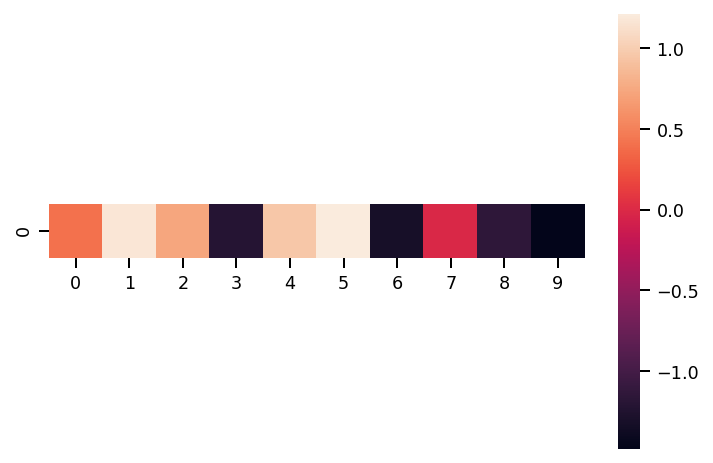

In [52]:
sns.heatmap(inp.squeeze(2), square=True);

In [55]:
inp = inp.permute(1, 2, 0)
print(inp.shape) # [batch_size, channels, seq]

torch.Size([10, 1, 1])


In [56]:
output = conv(inp)

In [57]:
output.shape

torch.Size([10, 1, 1])

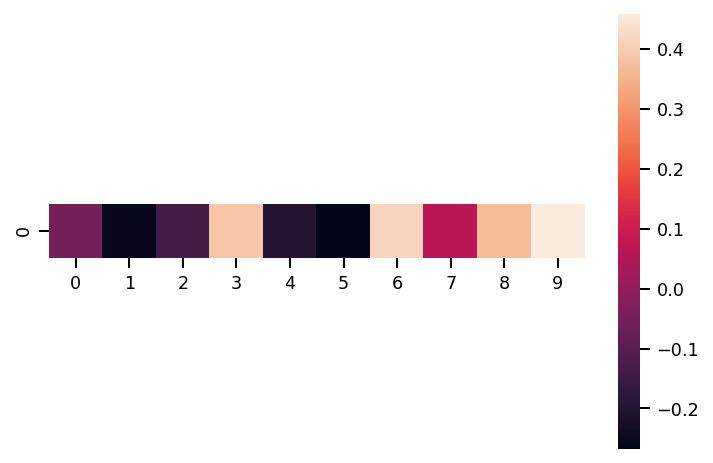

In [61]:
sns.heatmap(output.squeeze().unsqueeze(0).detach(), square=True);